# Principal component analysis (PCA)

### Introduction

Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest. In data analysis, the first principal component of a set of p variables, presumed to be normally distributed, is the derived variable formed as a linear combination of the original variables that explains the most variance. The second principal component explains the most variance in what is left once the effect of the first component is removed, and we may proceed through p iterations until all the variance is explained.


Principal component analysis (PCA) simplifies the complexity in high-dimensional data while retaining trends and patterns. It does this by transforming the data into fewer dimensions, which act as summaries of features. High-dimensional data are very common in biology and arise when multiple features, such as expression of many genes, are measured for each sample.

### Algorithm

PCA reduces data by geometrically projecting them onto lower dimensions called principal components (PCs), with the goal of finding the best summary of the data using a limited number of PCs. The first PC is chosen to minimize the total distance between the data and their projection onto the PC. By minimizing this distance, we also maximize the variance of the projected points, σ^2. The second (and subsequent) PCs are selected similarly, with the additional requirement that they be uncorrelated with all previous PCs.

PCA is defined as an orthogonal transformation that transforms the data to a new coordinate system such that the greatest variance by some scalar projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.

The goal of PCA is to reduce the dimensionality of the feature vectors used in training machine learning algorithms. The steps in PCA are:

1. **Stadardize (center and scale) the data.** 

To center the data, we average each row by replacing the value $x$ by 
$$
x - \text{mean}
$$
Data values may have vastly different ranges, and so, to ensure that PCA is not selecting wrong directions in describing data variation, we also divide by the standard deviation. That is, we scale the data in each variable by finding the *$z$-scores*:

$$
z = \frac{x - \text{mean}}{\text{standard devation}}
$$

Finally, we form the $m\times n$ matrix $A$. 

2. **Compute the covariance or correlation matrix**:

$$
S = \frac{1}{n-1}AA^T
$$

If we are working with only centered data, the above matrix is the covariance matrix, and if we are working with scaled data, then $S$ is the correlation matrix. The entries on the diagonal are the variances (or correlations) for each variable and the off-diagonal entries are the covariances (or correlations) between two variables: positive covariance indicates that the variables are directly related (when one increases, the other increases as well), negative covariance indicates inverse relationship (when one increases, the other decreases). This matrix is symmetric of size $m \times m$, so its columns are of the same size as the columns of $A$.

3. **Find the eigenvalues and the orthonormal eigenvectors of $S$.** 

These eigenvectors are columns of the matrix $U$ in the singular value decomposition of $A$, up to the factor $n-1$. Further, we denote the eigenvalues by $\sigma_{i}^{2}$. This is equivalent to the **Singular Value Decomposition** of our shifted training set matrix $A$,

$$
A = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^{T}, 
$$

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

penguins = sns.load_dataset("penguins").dropna()
X = penguins[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]].to_numpy()
y = penguins.species.to_numpy()

In [10]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [11]:
A = X - X.mean(axis = 0)

U, sigma, Vt = np.linalg.svd(A, full_matrices=False)

print(f"np.shape(U) = {np.shape(U)}")
print(f"np.shape(sigma) = {np.shape(sigma)}")
print(f"np.shape(Vt) = {np.shape(Vt)} \n")

np.shape(U) = (333, 4)
np.shape(sigma) = (4,)
np.shape(Vt) = (4, 4) 



In [12]:
sigma_mat = np.diag(sigma)
print(f"A == U * sigma_mat * Vt: {np.allclose(A, np.dot(U, np.dot(sigma_mat, Vt)))} \n")

A == U * sigma_mat * Vt: True 



4. **Find the principal components.**

We arrange the eigenvalues found in the previous step in the decreasing order. The first principal component $PC_1$ is in the direction of the 1st eigenvector, the second principal component $PC_2$ is in the direction of the 2nd eigenvector, etc. The entries of each $PC_i$ are called *loading scores* and they tell us how the $PC_i$ is a linear combination of features.

5. **Reduce the dimension of the data.**

We project data points (i.e., columns of $A$) onto the selected principal components (i.e., several eigenvectors of $S$). By the Eckart-Young theorem we know that the line closest to the data points is in the direction of $PC_1$, etc (”closest” is in the sense of perpendicular least squares).

In addition, the total variance, which is the trace of $S$, is

$$
T = \text{trace}(S) = \frac{\sigma_{1}^{2} + \dots + \sigma_{m}^{2}}{n-1},
$$

and the $i$-th principle component $PC_i$ explains

$$
\frac{\sigma_{i}^{2}/(n-1)}{T} = \frac{\sigma_{i}^{2}}{\sigma_{1}^{2} + \dots + \sigma_{m}^{2}}
$$

of the total variation. We use a scree plot to graph the percentages of variation that each $PC_i$ accounts for. Also, the sum of squared distances from the points projected to $PC_i$ to the origin is the eigenvalue for $PC_i$ or the squared singular value $\sigma_{i}^{2}$.


In [14]:
PC1 = Vt.T[:, 0]
PC2 = Vt.T[:, 1]
PC3 = Vt.T[:, 2]
PC4 = Vt.T[:, 3]

W2 = Vt.T[:, :2]
X2D = A.dot(W2)

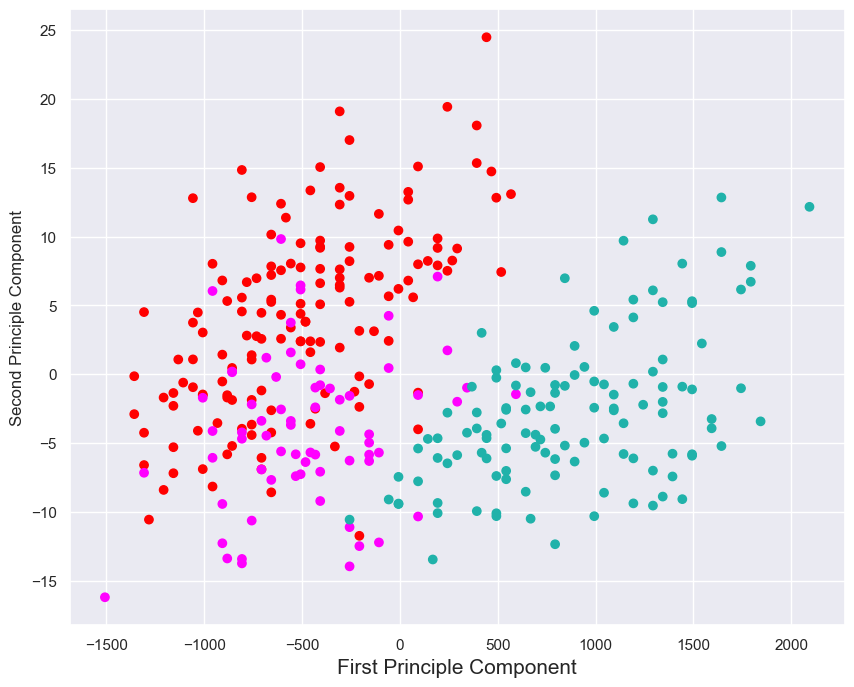

In [15]:
def colors(y):
    if y == "Adelie":
        return "red"
    elif y == "Chinstrap":
        return "magenta"
    else:
        return "lightseagreen"

c = [colors(label) for label in y]

plt.figure(figsize = (10, 8))
plt.scatter(X2D[:, 0], X2D[:, 1], c = c)
plt.xlabel("First Principle Component", fontsize = 15)
plt.ylabel("Second Principle Component")
plt.show()

In [16]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_X = preprocessing.scale(X)
pca = PCA()
pca.fit(scaled_X)

print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}")

per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")

pca.explained_variance_ratio_ = [0.68633893 0.19452929 0.09216063 0.02697115]
per_var = [68.63 19.45  9.22  2.7 ] 



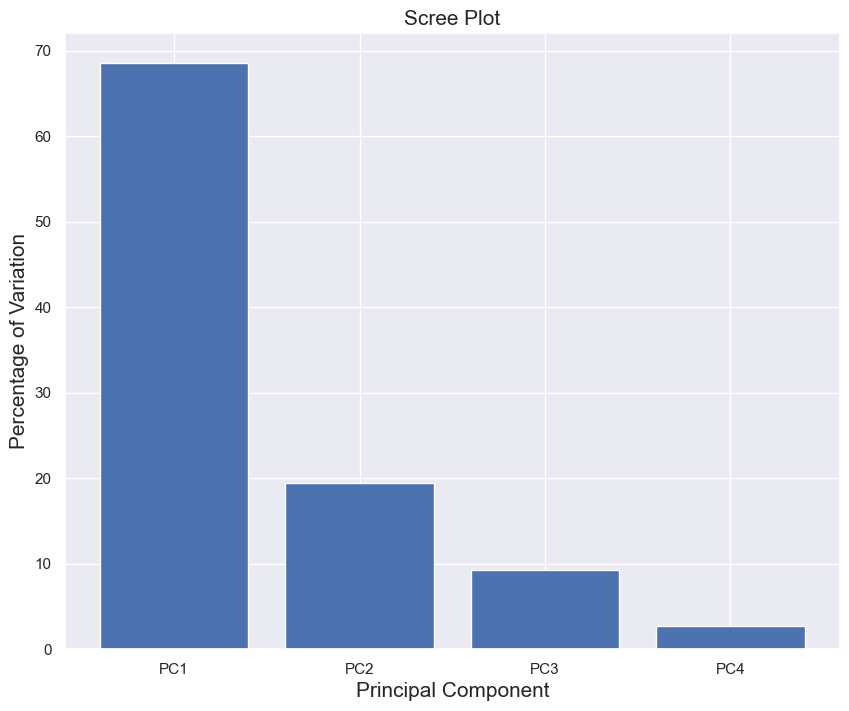

In [17]:
# Create a "Scree Plot" for the above array

labels = [f"PC{i}" for i in range(1,5)]
plt.figure(figsize = (10, 8))
plt.bar(x = range(1, 5), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.show()

In [18]:
features = list(set(penguins.columns) - {"species"}-{"island"}-{"sex"})
pd.DataFrame(data = pca.components_, columns = labels, index = features)

,PC1,PC2,PC3,PC4
bill_depth_mm,0.453753,-0.399047,0.576825,0.549675
flipper_length_mm,0.600195,0.796170,0.005788,0.076464
body_mass_g,0.642495,-0.425800,-0.236095,-0.591737
bill_length_mm,0.145170,-0.159904,-0.781984,0.584686


In [19]:
pca_data = pca.transform(scaled_X)

pca_df = pd.DataFrame(pca_data, columns = labels)

pca_df

,PC1,PC2,PC3,PC4
0,-1.853593,0.032069,-0.234902,0.528397
1,-1.316254,-0.443527,-0.027470,0.401727
2,-1.376605,-0.161230,0.189689,-0.528662
3,-1.885288,-0.012351,-0.628873,-0.472893
4,-1.919981,0.817598,-0.701051,-0.196416
...,...,...,...,...
328,1.997716,-0.976771,0.379425,0.160892
329,1.832651,-0.784510,0.240758,-0.008955
330,2.751505,0.266556,-0.419306,0.236256
331,1.713854,-0.725875,-0.262764,0.330004


In [20]:
projected_df = pd.concat([pca_df, penguins.species], axis = 1)
projected_df =projected_df[:333]#we have a few more rows with NaN values, drop these rows
projected_df

,PC1,PC2,PC3,PC4,species
0,-1.853593,0.032069,-0.234902,0.528397,Adelie
1,-1.316254,-0.443527,-0.027470,0.401727,Adelie
2,-1.376605,-0.161230,0.189689,-0.528662,Adelie
3,-1.885288,-0.012351,-0.628873,-0.472893,NaN
4,-1.919981,0.817598,-0.701051,-0.196416,Adelie
...,...,...,...,...,...
328,1.997716,-0.976771,0.379425,0.160892,Gentoo
329,1.832651,-0.784510,0.240758,-0.008955,Gentoo
330,2.751505,0.266556,-0.419306,0.236256,Gentoo
331,1.713854,-0.725875,-0.262764,0.330004,Gentoo


In [21]:
projected_df["color"] = c
projected_df

,PC1,PC2,PC3,PC4,species,color
0,-1.853593,0.032069,-0.234902,0.528397,Adelie,red
1,-1.316254,-0.443527,-0.027470,0.401727,Adelie,red
2,-1.376605,-0.161230,0.189689,-0.528662,Adelie,red
3,-1.885288,-0.012351,-0.628873,-0.472893,NaN,red
4,-1.919981,0.817598,-0.701051,-0.196416,Adelie,red
...,...,...,...,...,...,...
328,1.997716,-0.976771,0.379425,0.160892,Gentoo,lightseagreen
329,1.832651,-0.784510,0.240758,-0.008955,Gentoo,lightseagreen
330,2.751505,0.266556,-0.419306,0.236256,Gentoo,lightseagreen
331,1.713854,-0.725875,-0.262764,0.330004,Gentoo,lightseagreen


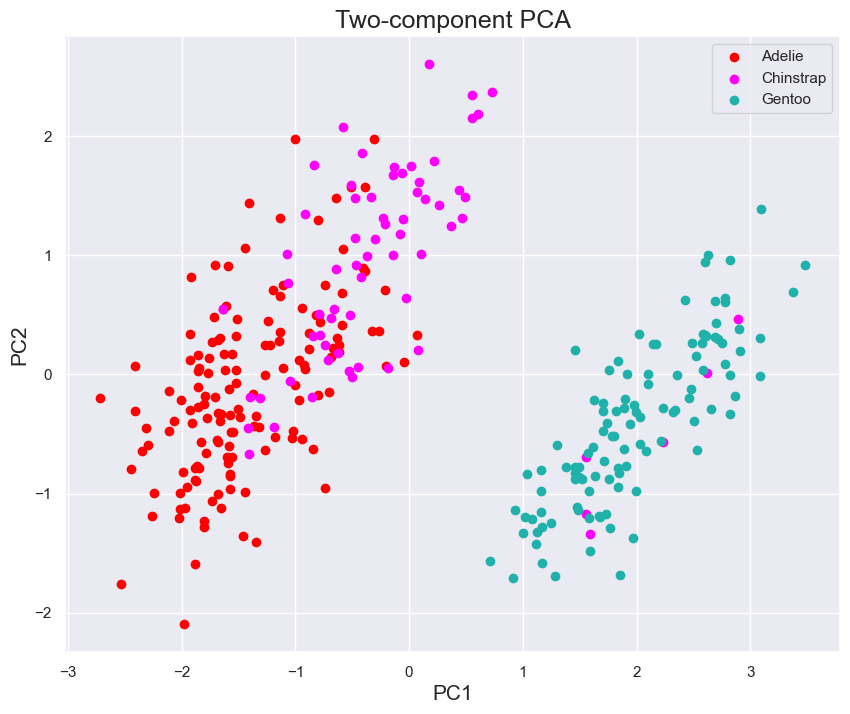

In [22]:
targets = ["Adelie", "Chinstrap", "Gentoo"]
colors = ["red", "magenta", "lightseagreen"]

plt.figure(figsize = (10, 8))

for target, color in zip(targets, colors):
    temp_df = projected_df[projected_df['species'] == target]
    plt.scatter(temp_df["PC1"],
                temp_df["PC2"],
                c = color)
    
plt.xlabel('PC1', fontsize = 15)
plt.ylabel('PC2', fontsize = 15)
plt.title('Two-component PCA', fontsize = 18)
plt.legend(targets)
plt.show()